# Analyse des Résultats du Problème Bancaire

Ce notebook analyse les résultats de la simulation de l'investissement bancaire en fonction du type de données et des options de compilation. Les résultats sont catégorisés pour la visualisation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Style des graphiques
sns.set_theme(style="whitegrid")

# Chemin vers le fichier CSV (ajuster si nécessaire)
results_file = 'results.csv'

# Vérifier si le fichier existe
if not os.path.exists(results_file):
    print(f"Erreur : Le fichier {results_file} n'a pas été trouvé. Assurez-vous qu'il est dans le bon répertoire.")
else:
    # Charger les données
    df = pd.read_csv(results_file)
    print("Données chargées :")
    display(df)

Données chargées :


,compil-option,type,result
0,NaN,float,-inf
1,NaN,double,-4.396804e+48
2,NaN,long double,2.064528e+45
3,-O2 -ffloat-store -fno-fast-math,float,-inf
4,-O2 -ffloat-store -fno-fast-math,double,-4.396804e+48
5,-O2 -ffloat-store -fno-fast-math,long double,2.064528e+45


## Catégorisation des Résultats

Nous allons créer une nouvelle colonne `category` basée sur les règles suivantes :
* Si `result > 1000`, catégorie = `'+inf'`
* Si `result < -10000`, catégorie = `'-inf'`
* Sinon (y compris les erreurs ou `-inf` textuel), catégorie = `'~0.0'` (ou une catégorie appropriée si d'autres cas existent)

In [2]:
def categorize_result(result):
    # Essayer de convertir en float d'abord
    try:
        val = float(result)
        if val > 1000:
            return '+inf'
        elif val < -10000:
            return '-inf'
        else:
            # Si entre -10000 et 1000 (y compris 0)
            return '~0.0' 
    except (ValueError, TypeError):
        # Gérer les cas comme '-inf' (string) ou les erreurs
        if isinstance(result, str) and 'inf' in result.lower():
             # Vérifier si c'est explicitement -inf
            if result.strip().startswith('-'): 
                return '-inf'
            else: # Supposer +inf pour les autres infinis
                 return '+inf' # Ou une catégorie d'erreur si préféré
        # Autres cas (erreurs de compilation/runtime stockées dans result)
        return 'Error/Other' 

if 'df' in locals():
    # Remplacer les NaN potentiels dans 'compil-option' pour le groupement
    df['compil-option'] = df['compil-option'].fillna('None')
    
    # Appliquer la catégorisation
    df['category'] = df['result'].apply(categorize_result)
    print("\nDonnées avec catégories :")
    display(df[['compil-option', 'type', 'result', 'category']])


Données avec catégories :


,compil-option,type,result,category
0,None,float,-inf,-inf
1,None,double,-4.396804e+48,-inf
2,None,long double,2.064528e+45,+inf
3,-O2 -ffloat-store -fno-fast-math,float,-inf,-inf
4,-O2 -ffloat-store -fno-fast-math,double,-4.396804e+48,-inf
5,-O2 -ffloat-store -fno-fast-math,long double,2.064528e+45,+inf


## Graphique 1 : Comparaison par Type de Données

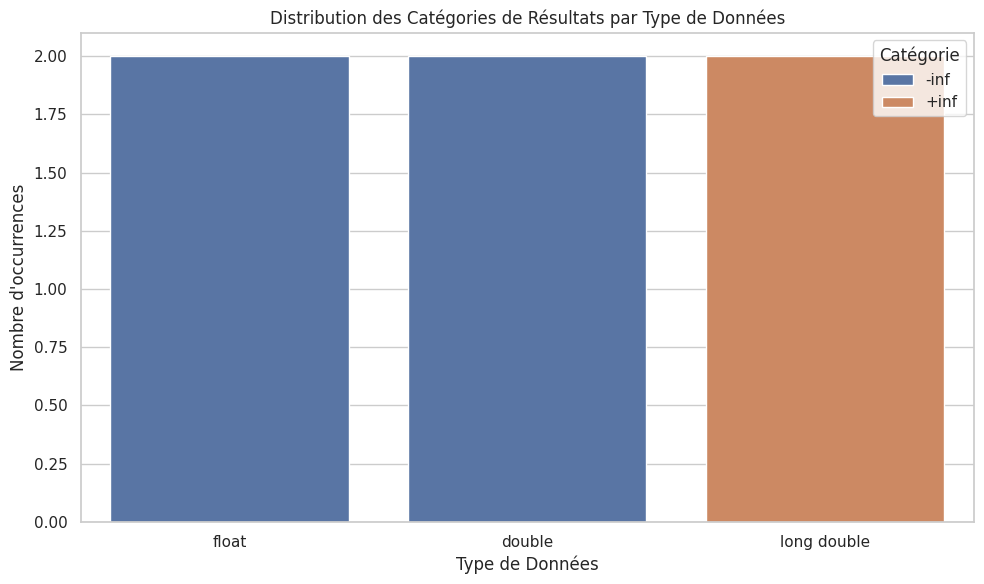

In [3]:
if 'df' in locals():
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='type', hue='category', order=['float', 'double', 'long double'])
    plt.title('Distribution des Catégories de Résultats par Type de Données')
    plt.xlabel('Type de Données')
    plt.ylabel('Nombre d\'occurrences')
    plt.legend(title='Catégorie')
    plt.tight_layout()
    plt.show()

## Graphique 2 : Comparaison par Options de Compilation

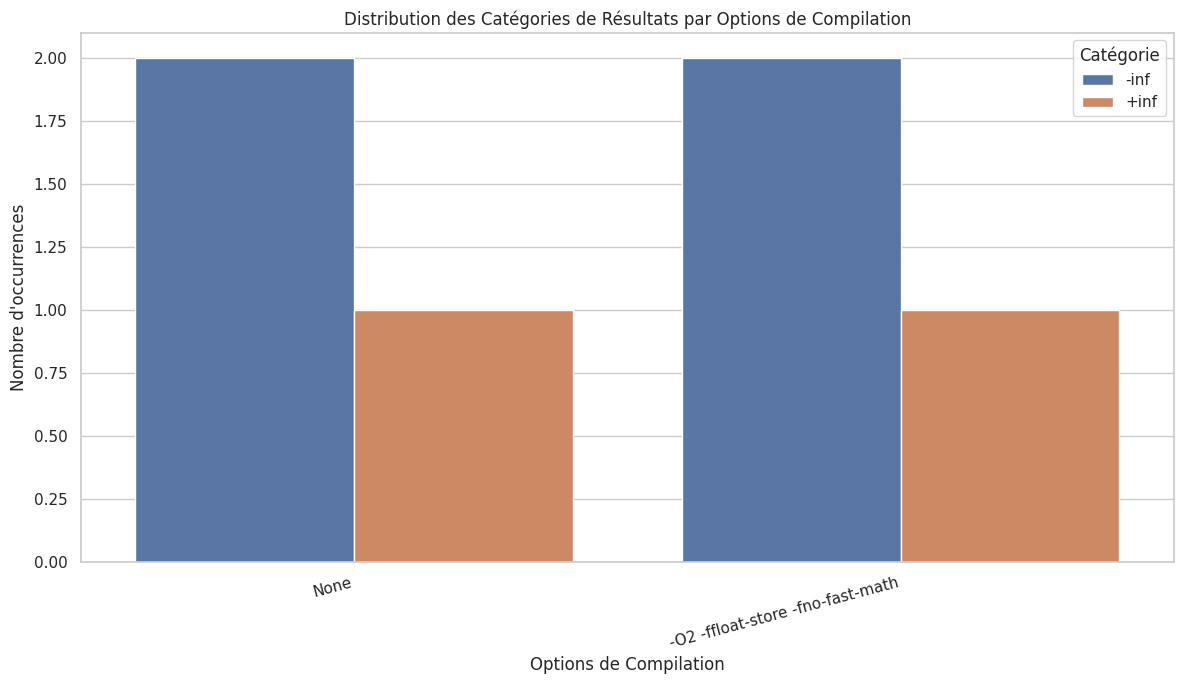

In [4]:
if 'df' in locals():
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x='compil-option', hue='category')
    plt.title('Distribution des Catégories de Résultats par Options de Compilation')
    plt.xlabel('Options de Compilation')
    plt.ylabel('Nombre d\'occurrences')
    plt.xticks(rotation=15, ha='right') # Rotation pour meilleure lisibilité si options longues
    plt.legend(title='Catégorie')
    plt.tight_layout()
    plt.show()

## Interprétation

Les graphiques montrent comment les différentes configurations (type et options de compilation) mènent à des résultats finaux radicalement différents, tombant dans les catégories `+inf`, `-inf`. Aucun paramètres ne nous a permis de réussir à obtenir le bon résultat qui est de 0.02.